In [54]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [55]:
# Importing & Exploring data
sales = pd.read_csv('product_sales.csv')
print(sales.head())
print(sales.info())
print(sales.describe())
print(sales.isna().sum())

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None
   

Initial overview from the data exploration:
- The dataset has 1500 rows and 8 columns
- Only the revenue column has missing data of 1074
- Data type of each column is correct

Now we can move to the data validation step for each column.

# Data Validation

### _week_ column


In [56]:
sales['week'].value_counts().sort_index()

1    3721
2    2491
3    2411
4    2575
5    2574
6    1228
Name: week, dtype: int64

### _sales_method_ column

In [57]:
sales['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

### _customer_id_ column

In [58]:
sales['customer_id'].nunique()

15000

### _nb_sold_ column

In [59]:
sales['nb_sold'].value_counts().sort_index()

7      698
8     1941
9     3535
10    3677
11    2439
12    1088
13     939
14      97
15     555
16      31
Name: nb_sold, dtype: int64

### _revenue_ column

In [60]:
sales['revenue'].isnull().sum()

1074

### _years_as_customer_ column

In [61]:
sales[sales['years_as_customer']>40].value_counts()

week  sales_method  customer_id                           nb_sold  revenue  years_as_customer  nb_site_visits  state     
2     Email         18919515-a618-430c-9a05-2c7d8fea96af  10       97.22    63                 24              California    1
4     Call          2ea97d34-571d-4e1b-95be-fea1c404649f  10       50.47    47                 27              California    1
dtype: int64

### _nb_site_visits_ column

In [62]:
sales['nb_site_visits'].value_counts()


25    1688
26    1645
24    1601
23    1478
27    1440
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
12       1
41       1
Name: nb_site_visits, dtype: int64

### _state_ column

In [63]:
sales['state'].nunique()

50

## Data Validation Result
- _week_ column: no missing data; no cleaning needed.
- **_sales_method_** column: fixing typos and standardize the of writing the three methods as "Email, Call, and Email + Call".
- _customer_id_ column: no missing data; no duplicates; no cleaning needed.
- _nb_sold_ column: no missing data; no cleaning needed.
- **_revenue_ column**: 1074 missing values; will check the proper way to fill these values.
- **_years_as_customer_** column: two values were higher than 40, which made no sense since the company was founded 40 years ago. We will replace these values with the max number possible.
- _nb_site_visits_ column: no missing data; no cleaning needed.
- _state_ column: no missing data; all 50 US unique states exist; no cleaning needed.


# Data Cleaning

### _sales_method_

In [64]:
# Standardizing the categories in the 'sales_method' column

sales["sales_method"].replace({"email" : "Email", "em + call": "Email + Call"}, inplace=True)
sales['sales_method'].value_counts() # validating

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

### _revenue_

In [65]:
# Checking if the percentage of the missing values > 5%
threshold = len(sales) * 0.05
cols_to_drop = sales.columns[sales.isna().sum() <= threshold]
sales.dropna(subset=cols_to_drop, inplace = True)
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [66]:
# Filling missing data by the median of the revenue data 
# Imputating Missing Data by Sub-group
revenue_dict=sales.groupby('sales_method')['revenue'].median().to_dict()
sales['revenue'] = sales['revenue'].fillna(sales['sales_method'].map(revenue_dict))
print(sales.info()) # validating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


### _years_as_customer_

In [67]:
# Replacing any value higher than 40 with 40
sales["years_as_customer"] = sales["years_as_customer"].apply(lambda x: 40 if x > 40 else x)
sales[sales["years_as_customer"]>40]  # validating

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


# Data Analysis

Text(0, 0.5, 'Number of Customers')

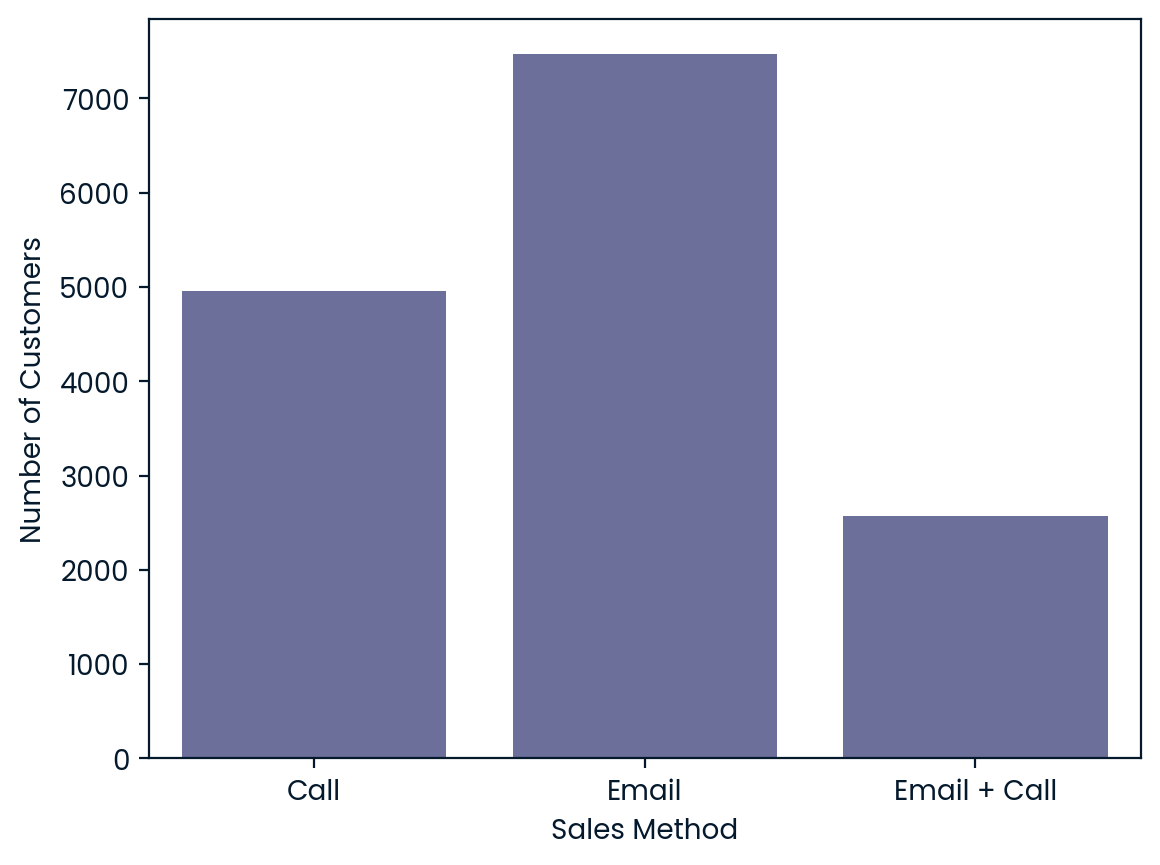

In [68]:
# How many customers were there for each approach?
cust_num_per_approach = sales.groupby('sales_method')['customer_id'].count().reset_index()

sns.barplot(data=cust_num_per_approach, x='sales_method', y='customer_id')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')

<AxesSubplot: xlabel='revenue', ylabel='Count'>

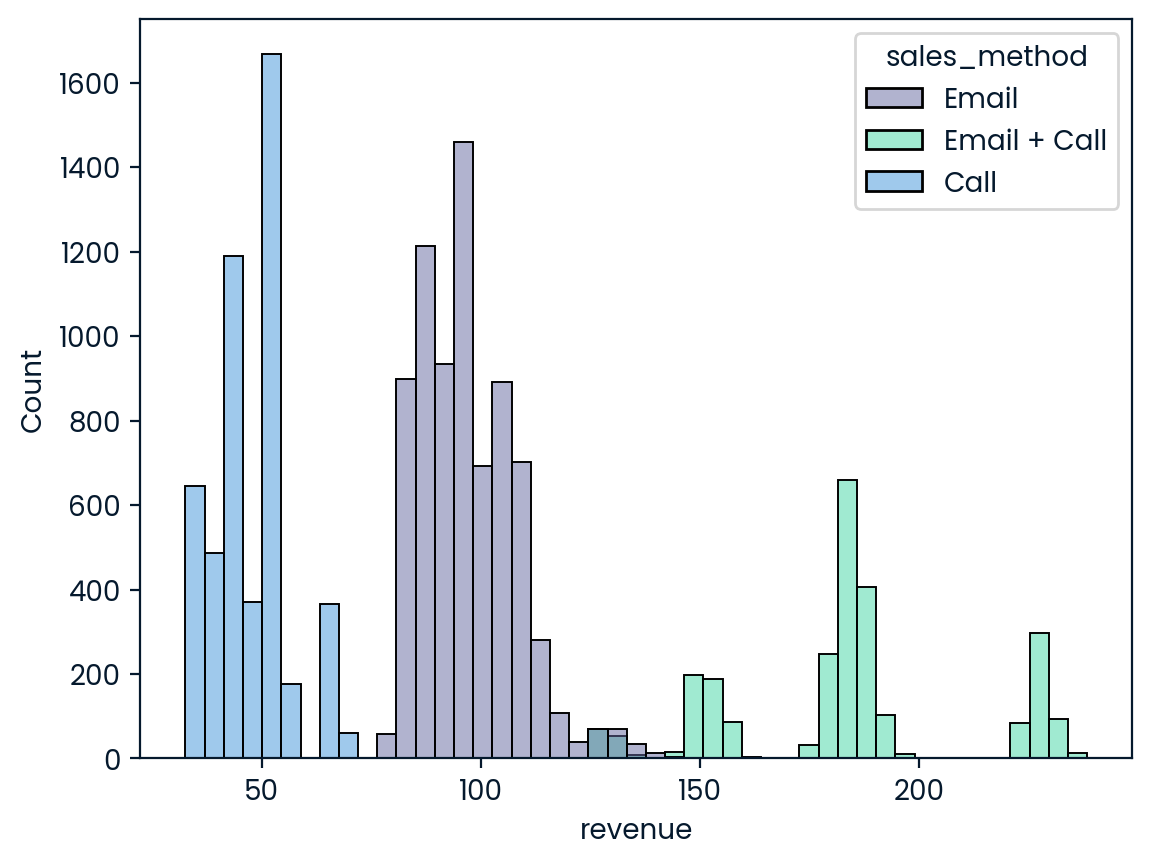

In [69]:
# What does the spread of the revenue look like overall? And for each method?
sns.histplot(data=sales, x='revenue', hue='sales_method')

<AxesSubplot: xlabel='revenue', ylabel='Count'>

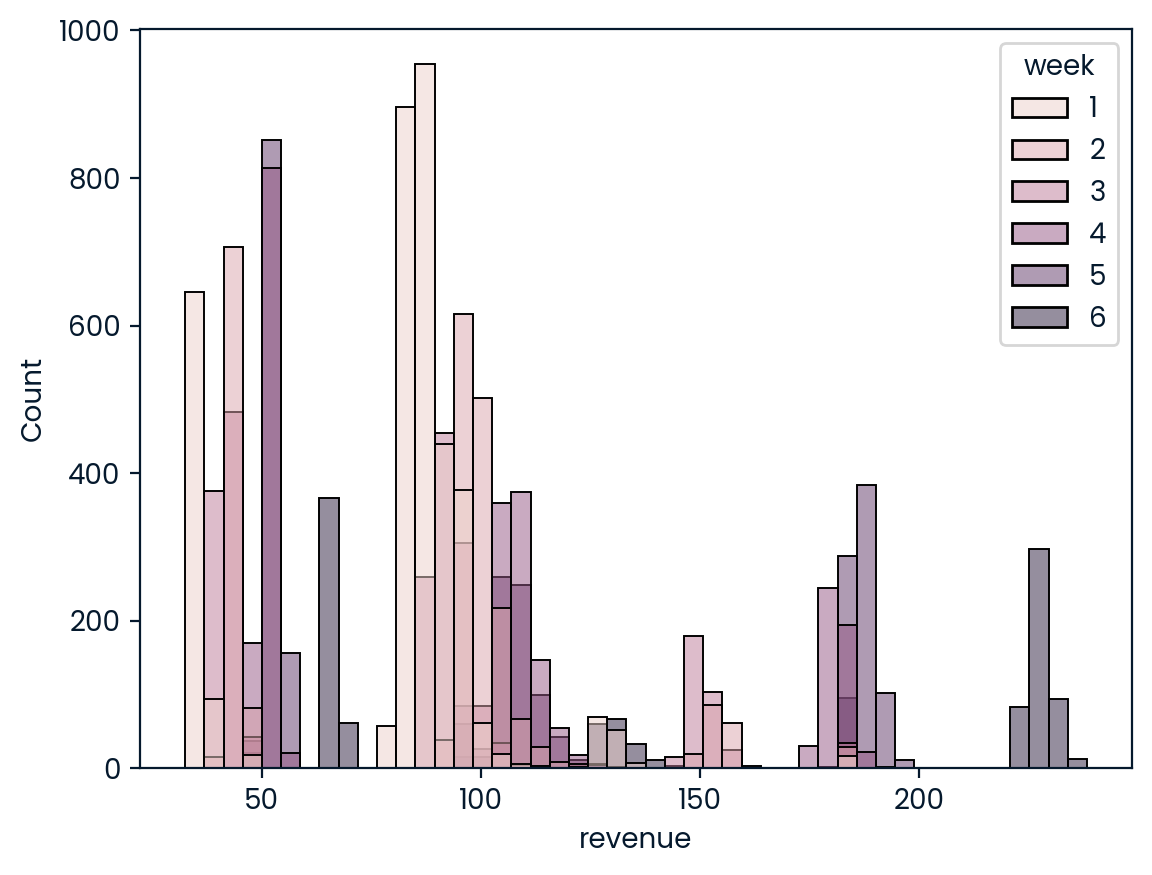

In [70]:
# Was there any difference in revenue over time for each of the methods?
sns.histplot(data=sales, x='revenue', hue='week')

   week    revenue
0     1  294898.52
1     2  215307.60
2     3  200035.13
3     4  257268.61
4     5  282757.81
5     6  183221.79


<AxesSubplot: xlabel='week', ylabel='revenue'>

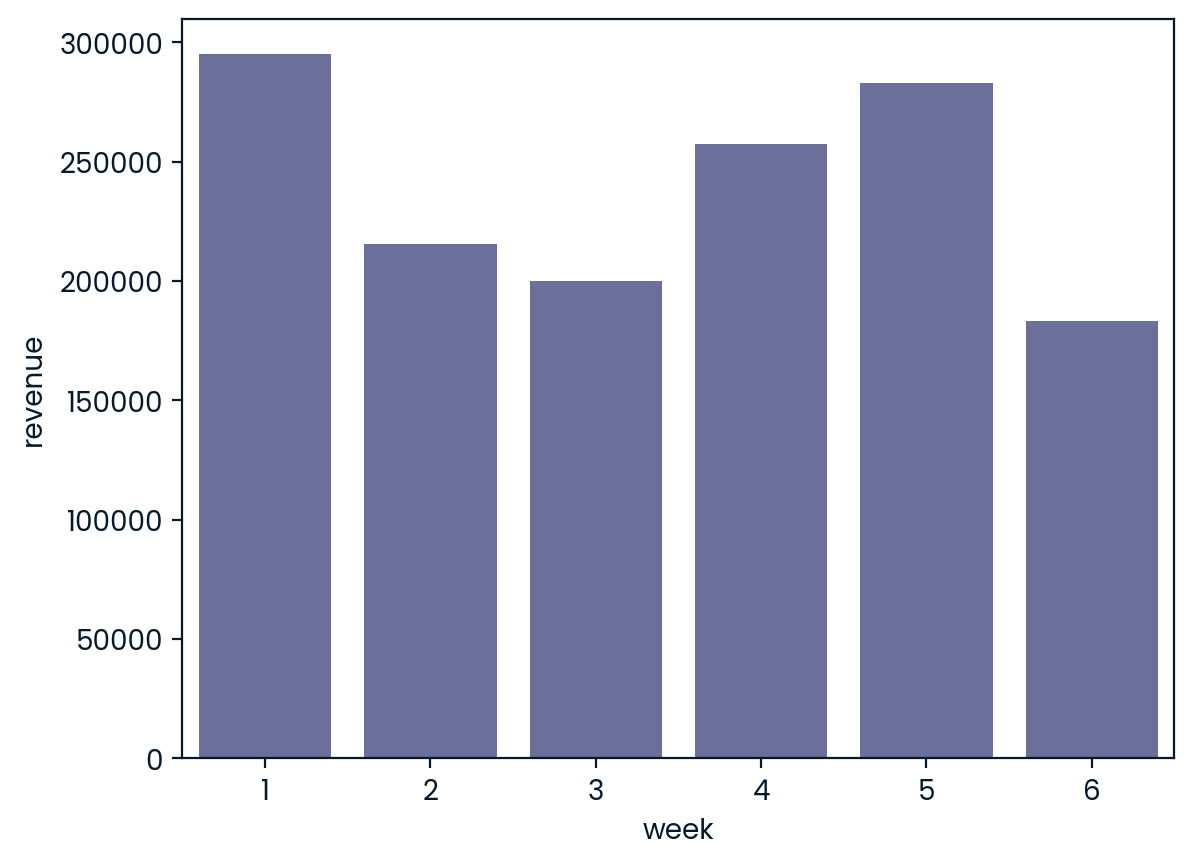

In [71]:
# Groupping Revenue by Week
revenue_per_week = sales.groupby('week')['revenue'].sum().reset_index()
print(revenue_per_week)

sns.barplot(data=revenue_per_week, x='week', y='revenue')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `[Alternative text in case your image doesn’t appear](filename.jpg)'


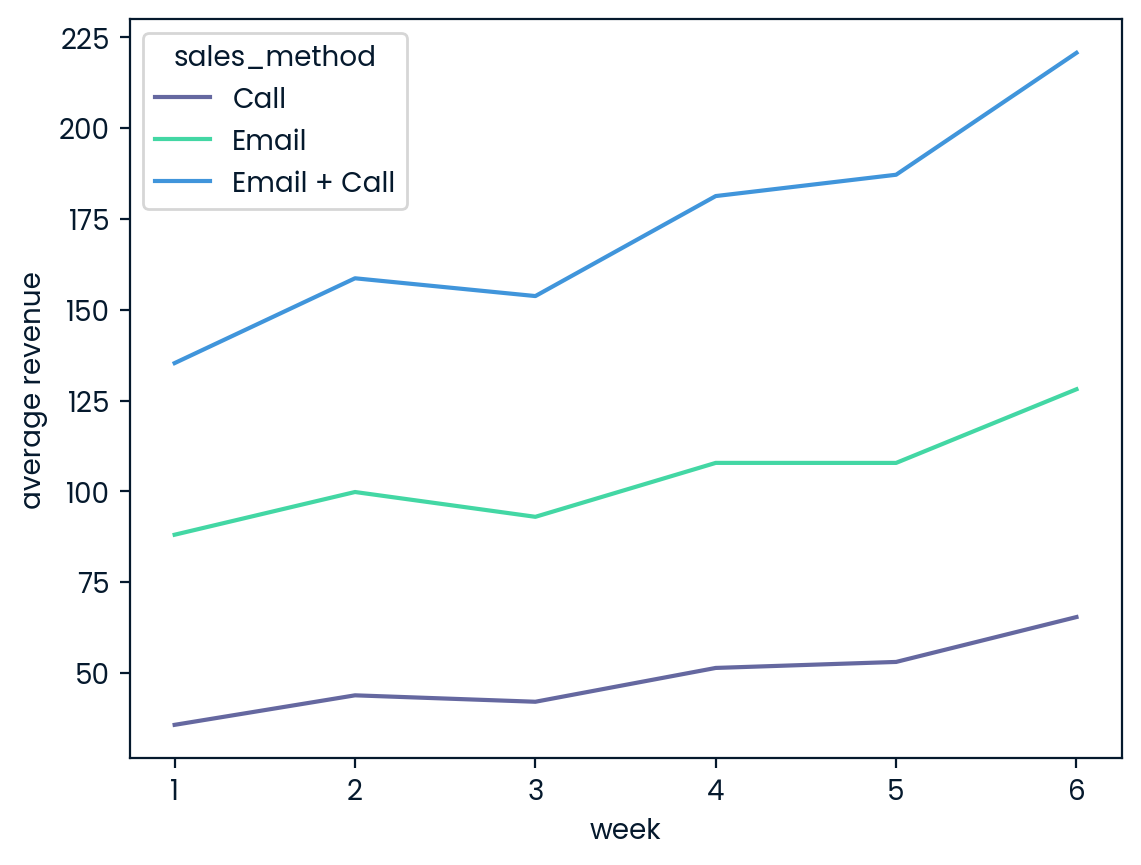

In [72]:
revenue_per_week = sales.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

sns.lineplot(data=revenue_per_week, x='week', y='revenue', hue='sales_method')
plt.ylabel('average revenue')
![Alternative text in case your image doesn’t appear](filename.jpg)

<AxesSubplot: xlabel='revenue', ylabel='state'>

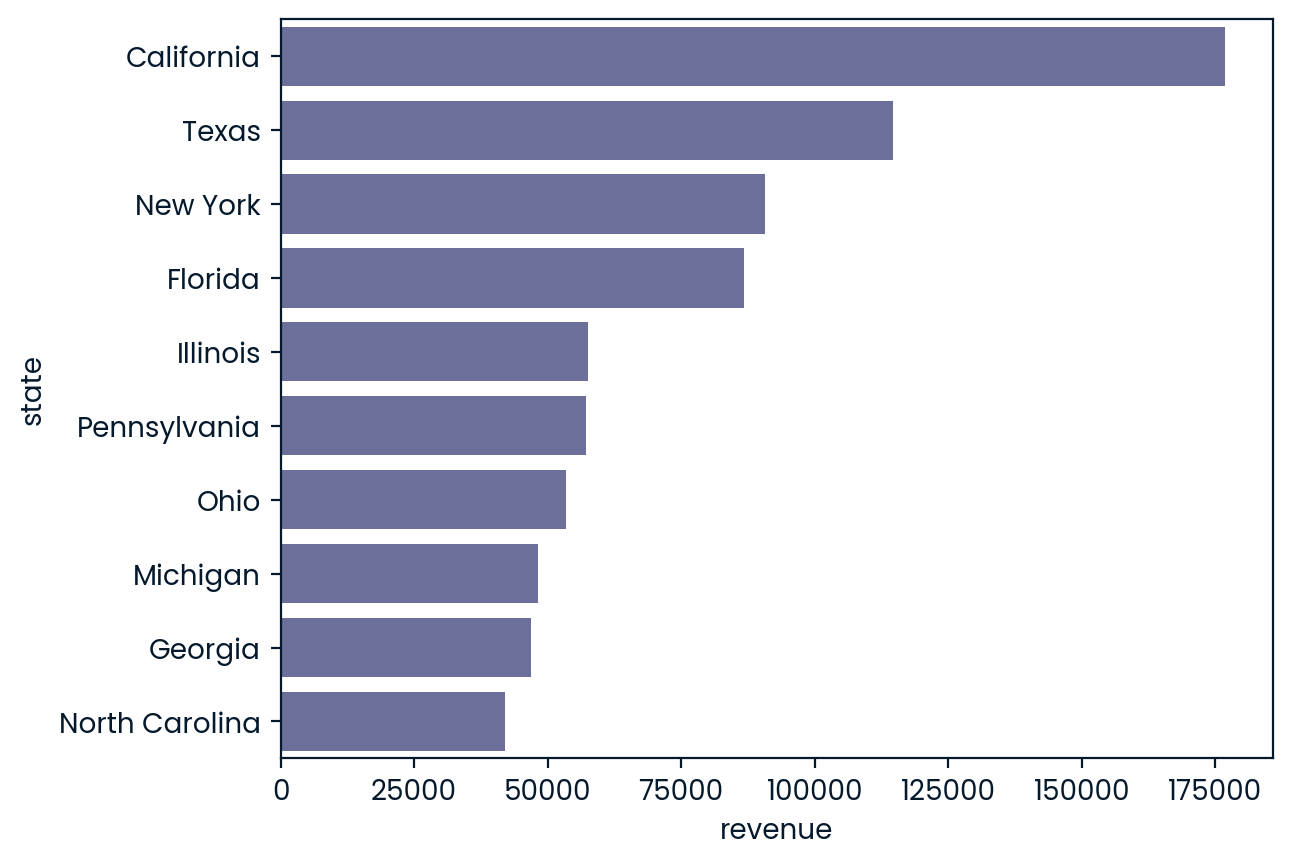

In [73]:
# Revenue by State
revenue_by_state = sales.groupby('state')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(10)
sns.barplot(data=revenue_by_state, x='revenue', y='state')

         state  customer_id
4   California         1872
42       Texas         1187
31    New York          965
8      Florida          904
12    Illinois          617


Text(0.5, 0, 'number of customers')

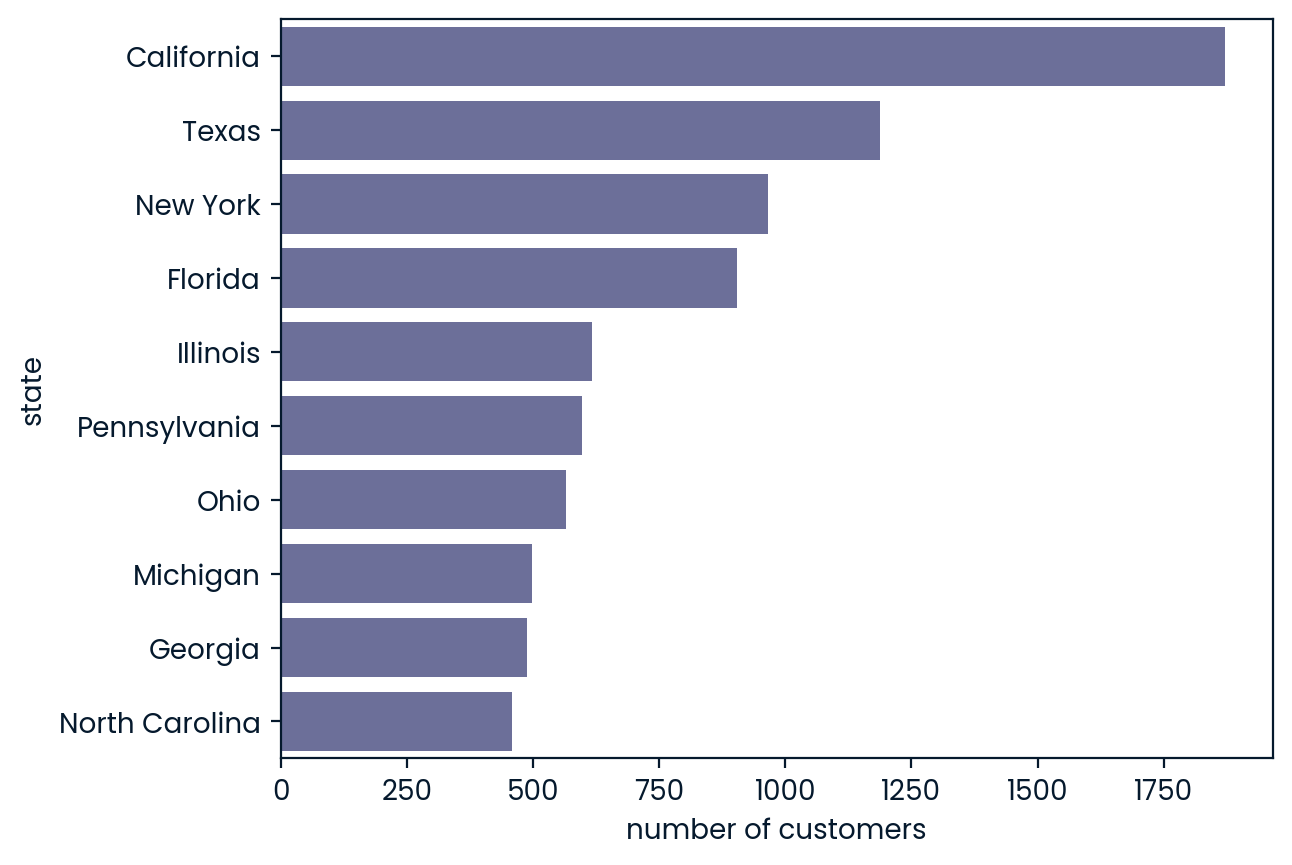

In [74]:
# Customers by State
customer_by_state = sales.groupby('state')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False).head(10)
print(customer_by_state.head())
sns.barplot(data=customer_by_state, x='customer_id', y='state')
plt.xlabel('number of customers')